In [2]:
import pandas as pd
df = pd.read_csv('../data/final_df_points_18_21.csv')
df.head()

,bike_id,lat,lng,dt_start,dt_end,hex_id,in_zone,zone_name,end_station_number,temp,...,snow,wind_speed,humidity,year,month,day,start_min,over_night,idle_time_next_day,idle_time
0,3694,51.323619,12.335887,1514764029,1514764799,881f1a8d91fffff,1,Pinke Zone Leipzig West 1€,4094,10.80,...,0.0,7.2,76.0,2017,12,6,1427,1,821,12
1,2508,51.323619,12.335887,1514764035,1514764799,881f1a8d91fffff,1,Pinke Zone Leipzig West 1€,4094,10.80,...,0.0,7.2,76.0,2017,12,6,1427,1,1439,12
2,41851,51.332415,12.395158,1514764638,1514764799,881f1a1659fffff,1,Pinke Zone Leipzig Ost 1€,0,10.80,...,0.0,7.2,76.0,2017,12,6,1437,1,1439,2
3,3694,51.323619,12.335887,1514764800,1514814103,881f1a8d91fffff,1,Pinke Zone Leipzig West 1€,4094,10.86,...,0.0,9.3,76.0,2018,1,0,0,0,0,821
4,2508,51.323619,12.335887,1514764800,1514851199,881f1a8d91fffff,1,Pinke Zone Leipzig West 1€,4094,10.86,...,0.0,9.3,76.0,2018,1,0,0,1,878,1439


In [3]:
df = df.sort_values('dt_start').reset_index(drop=True)

In [4]:
df.tail()

,bike_id,lat,lng,dt_start,dt_end,hex_id,in_zone,zone_name,end_station_number,temp,...,snow,wind_speed,humidity,year,month,day,start_min,over_night,idle_time_next_day,idle_time
2551920,72058,51.317569,12.382730,1640897593,1640904368,881f1a1609fffff,1,Blaue Zone Leipzig Ost 0€,0,13.19,...,0.0,8.94,83.0,2021,12,3,1253,0,0,112
2551921,71949,51.334711,12.356763,1640897835,1640899343,881f1a1649fffff,1,Pinke Zone Leipzig Ost 1€,0,13.19,...,0.0,8.94,83.0,2021,12,3,1257,0,0,25
2551922,97785,51.367276,12.369792,1640898086,1640900985,881f1a8c8bfffff,1,Blaue Zone Leipzig Ost 0€,0,13.05,...,0.0,8.05,84.0,2021,12,3,1261,0,0,48
2551923,41738,51.366942,12.370322,1640900918,1640903516,881f1a8c8bfffff,1,Pinke Zone Leipzig Ost 1€,0,13.05,...,0.0,8.05,84.0,2021,12,3,1309,0,0,43
2551924,72028,51.332844,12.404319,1640903200,1640905163,881f1a165bfffff,1,Blaue Zone Leipzig Ost 0€,0,13.11,...,0.0,8.05,81.0,2021,12,3,1347,0,0,32


In [5]:
import numpy as np

tsdata = pd.DataFrame({ 'date': [1,2,3,4,5,6,7,8,9,10,11,12], 'bike_count': 0})
tsdata = tsdata.set_index('date')
tsdata.head()

,bike_count
date,
1,0
2,0
3,0
4,0
5,0


In [6]:
from matplotlib import pyplot as plt
import statistics
from tqdm import tqdm
df['time_start'] = pd.to_datetime(df['dt_start'],unit='s')

def count(year):
    for ind in tqdm(df.index):
        if df['time_start'][ind].year == year:
            tsdata['bike_count'][df['time_start'][ind].month] += 1
    return tsdata

def plot(year,tsdata):
    fig, ax = plt.subplots()
    # plotting monthly data
    ax.plot(tsdata)
    ax.set_xlabel('month')
    ax.set_ylabel('rentals')
    # show values
    ax.set_title(f'Rentals from year {year}')
    plt.show()


100%|██████████| 2551925/2551925 [00:42<00:00, 60535.23it/s] 


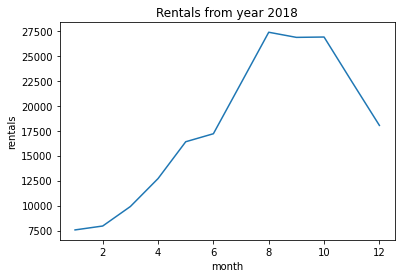

      bike_count
date            
1           7562
2           7953
3           9906
4          12704
5          16391
6          17193
7          22267
8          27356
9          26842
10         26877
11         22427
12         18026


100%|██████████| 2551925/2551925 [01:20<00:00, 31547.66it/s] 


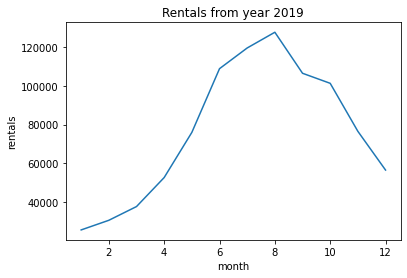

      bike_count
date            
1          25490
2          30473
3          37578
4          52594
5          75953
6         108921
7         119632
8         127770
9         106543
10        101344
11         76508
12         56468


100%|██████████| 2551925/2551925 [01:37<00:00, 26293.45it/s] 


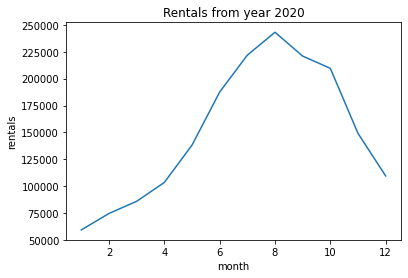

      bike_count
date            
1          59181
2          74491
3          85805
4         103347
5         138034
6         187513
7         221861
8         243208
9         221008
10        209616
11        149083
12        109448


100%|██████████| 2551925/2551925 [01:30<00:00, 28332.45it/s] 


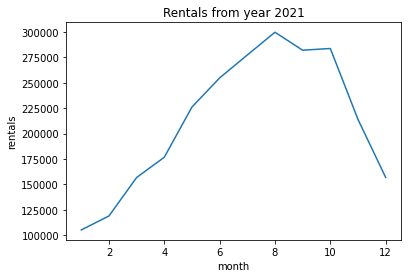

      bike_count
date            
1         105050
2         118798
3         156695
4         176664
5         226130
6         254806
7         277381
8         299793
9         282094
10        283791
11        213947
12        156773


In [7]:
for year in [2018,2019,2020,2021]:
    tsdata = count(year)
    plot(year,tsdata)
    print(tsdata)

In [ ]:
tsdata